# Part 2: Linear and Polynomial Regression

One of the simpliest way to model data is regression. One of the most common types of regression is linear regression. Another version is the polynomial regression which uses a different fitting function. Both of these will be explored in this notebook

Here are some reference links about linear and polynomial regression:
* [Source 1](https://realpython.com/linear-regression-in-python/)
* [Source 2](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)

In [301]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


#I tooke the appl stock data and moved it into a more convient file location
pathToData = "StockData\AppleStock.txt"

#Check if there is a valid file in directory
if(os.path.isfile(pathToData)):
    print("Path Found")
    data = pd.read_csv(pathToData, sep = ",")
else:
    print("Path Not Found")

Path Found


In [302]:
datesData = data["Date"].tolist()
openPriceData = data["Open"].tolist() 
closePricedata = data["Close"].tolist()

print(len(datesData))
frontSlice = 8364 - 3650
endSlice = 8364
trimDatesData = datesData[frontSlice:endSlice]
trimOpenPriceData = openPriceData[frontSlice:endSlice]
trimClosePriceData = closePricedata[frontSlice:endSlice]

8364


In [303]:
trimNetPriceDiffData = []
for i in range(len(trimDatesData)):
    netDiff = trimOpenPriceData[i] - trimClosePriceData[i]
    trimNetPriceDiffData.append(netDiff)
#Compare the Net Price Change with the original price
trimPercentDiffData = []
for i in range(len(trimDatesData)):
    percentDiff = (trimNetPriceDiffData[i] / trimOpenPriceData[i]) * 100
    trimPercentDiffData.append(percentDiff)

In [304]:
#The Dates are in the in a string format. For a linear regression analysis,
#the dates need to placed into numeric values. We can correspond the dates to
#numbers from 0 - endDate
numericDatesData = []
for i in range(len(trimDatesData)):
    numericDatesData.append([i])
numericDatesData = np.array(numericDatesData)

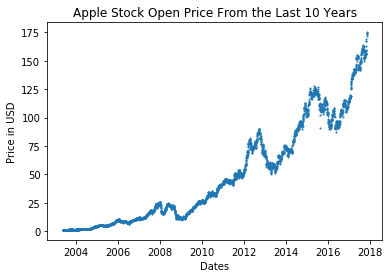

In [305]:
#Part A: Compare Stock Open Price vs Time
#Plotting Open Price vs Time
fig, ax = plt.subplots()
plt.plot_date(trimDatesData, trimOpenPriceData, markersize = 1)
plt.title("Apple Stock Open Price From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.show()

In [306]:
#Creating a Linear Regression Model
#Splitting the Data into an 80 20 split
X_train, X_test, y_train, y_test = train_test_split(
    numericDatesData, trimOpenPriceData, test_size = 0.2, random_state = 0)

linRegress = LinearRegression()  
linRegress.fit(X_train, y_train)
y_pred = linRegress.predict(X_test)

In [307]:
#Linear Regression has the formula y = mx + b
print('Intercept:', linRegress.intercept_)
print('Slope:', linRegress.coef_[0])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept: -22.912103941923014
Slope: 0.03956195024879841
Mean Absolute Error: 12.144023757914004
Mean Squared Error: 217.02130883804753
Root Mean Squared Error: 14.731643113992666


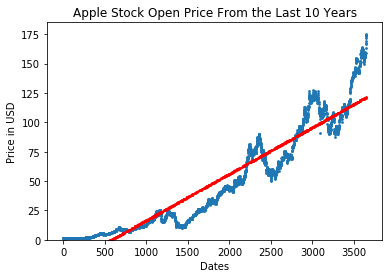

In [308]:
fig, ax = plt.subplots()
plt.scatter(numericDatesData, trimOpenPriceData, s = 3)
plt.scatter(X_test, y_pred, color = "red", s = 3)
plt.title("Apple Stock Open Price From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.ylim(0, max(trimOpenPriceData) + 10)
plt.show()

In [309]:
#Creating a Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures

x_polyTrain = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(X_train)
x_polyTest = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(X_test)

model = LinearRegression().fit(x_polyTrain, y_train)
y_pred = model.predict(x_polyTest)

In [310]:
#Linear Regression has the formula y = ax^2 + bx + c
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.576415960403138
Mean Squared Error: 90.92922065490428
Root Mean Squared Error: 9.53568144680307


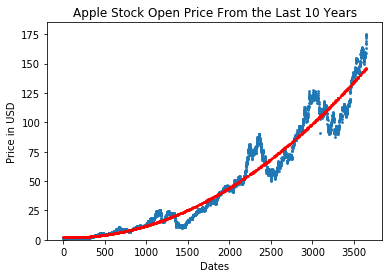

In [311]:
fig, ax = plt.subplots()
plt.scatter(numericDatesData, trimOpenPriceData, s = 3)
plt.scatter(X_test, y_pred, color = "red", s = 3)
plt.title("Apple Stock Open Price From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.ylim(0, max(trimOpenPriceData) + 10)
plt.show()

In [312]:
#let us find the the best polynomial
comp_index = []
for i in range(100):
    if i > 0:
        try:
            
            x_polyTrain = PolynomialFeatures(degree = i, include_bias = False).fit_transform(X_train)
            x_polyTest = PolynomialFeatures(degree = i, include_bias = False).fit_transform(X_test)
            model = LinearRegression().fit(x_polyTrain, y_train)
            y_pred = model.predict(x_polyTest)
            mae = metrics.mean_absolute_error(y_test, y_pred)
            mse = metrics.mean_squared_error(y_test, y_pred)
            root_mse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            comp_index.append([i, mae, mse, root_mse])
        except:
            pass
#Find the Best Index
index = 0
mean_absolute_error = 9999
mse = 9999
root_mse = 9999
best_index = [index, mean_absolute_error, mse, root_mse]
for model in comp_index:
    if (model[1] < best_index[1] or model[2] < best_index[2] or model[3] < best_index[3]):
        best_index = model 
print("Best Index out of", len(comp_index), "is:")
print(best_index)


Best Index out of 86 is:
[8, 6.8870212850388235, 83.75651670494126, 9.15185864756123]


There is something to note. As the power of the leading term increases, the data could be prone to overfitting. This occurs when the equation matches the dataset very well, but it loses its ability to predict future data. 

In [313]:
x_power = []
MAEData = []
MSEData = []
RootMSEData = []

for model in comp_index:
    x_power.append(model[0])
    MAEData.append(model[1])
    MSEData.append(model[2])
    RootMSEData.append(model[3])    

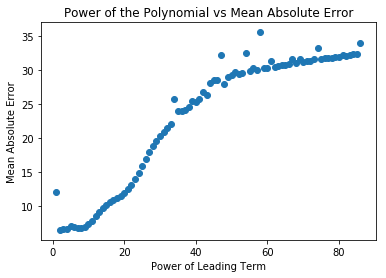

In [314]:
fig, ax = plt.subplots()
plt.scatter(x_power, MAEData)
plt.title("Power of the Polynomial vs Mean Absolute Error")
plt.xlabel("Power of Leading Term")
plt.ylabel("Mean Absolute Error")
plt.show()

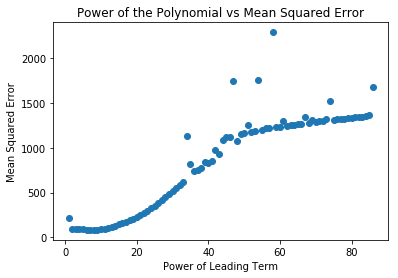

In [315]:
fig, ax = plt.subplots()
plt.scatter(x_power, MSEData)
plt.title("Power of the Polynomial vs Mean Squared Error")
plt.xlabel("Power of Leading Term")
plt.ylabel("Mean Squared Error")
plt.show()

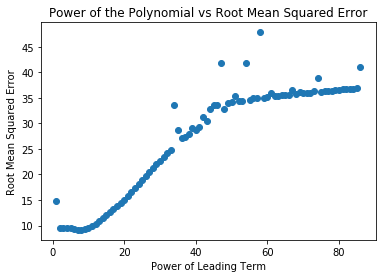

In [316]:
fig, ax = plt.subplots()
plt.scatter(x_power, RootMSEData)
plt.title("Power of the Polynomial vs Root Mean Squared Error")
plt.xlabel("Power of Leading Term")
plt.ylabel("Root Mean Squared Error")
plt.show()

Note: This implies that the best Leading Terms are either 2 or 44. 

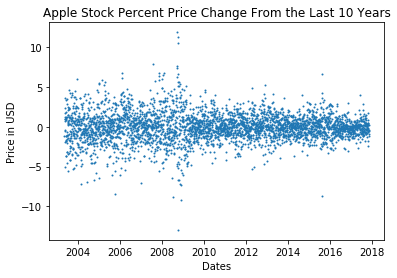

In [317]:
#Part B: Percent Change Over Time
fig, ax = plt.subplots()
plt.plot_date(trimDatesData, trimPercentDiffData, markersize = 1)
plt.title("Apple Stock Percent Price Change From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.show()    

In [318]:
#Creating a Linear Regression Model
#Splitting the Data into an 80 20 split
X_train, X_test, y_train, y_test = train_test_split(
    numericDatesData, trimPercentDiffData, test_size = 0.2, random_state = 0)

linRegress = LinearRegression()  
linRegress.fit(X_train, y_train)
y_pred = linRegress.predict(X_test)

In [319]:
#Linear Regression has the formula y = mx + b
print('Intercept:', linRegress.intercept_)
print('Slope:', linRegress.coef_[0])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept: -0.08248668355152484
Slope: 3.756274929122486e-05
Mean Absolute Error: 1.3448528734897773
Mean Squared Error: 3.6215683846393123
Root Mean Squared Error: 1.903041876743471


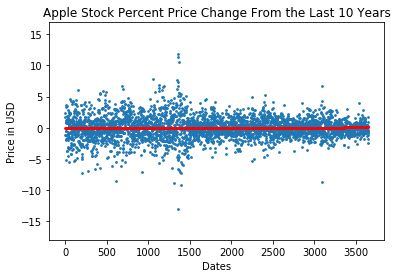

In [320]:
fig, ax = plt.subplots()
plt.scatter(numericDatesData, trimPercentDiffData, s = 3)
plt.scatter(X_test, y_pred, color = "red", s = 3)
plt.title("Apple Stock Percent Price Change From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.ylim(min(trimPercentDiffData)-5, max(trimPercentDiffData) + 5)
plt.show()

In [321]:
#Creating a Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures

x_polyTrain = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(X_train)
x_polyTest = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(X_test)

model = LinearRegression().fit(x_polyTrain, y_train)
y_pred = model.predict(x_polyTest)

In [322]:
#Linear Regression has the formula y = ax^2 + bx + c
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3421198190704442
Mean Squared Error: 3.61415772943795
Root Mean Squared Error: 1.9010938244699944


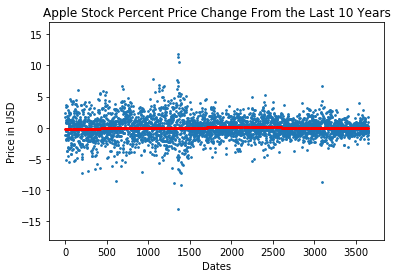

In [323]:
fig, ax = plt.subplots()
plt.scatter(numericDatesData, trimPercentDiffData, s = 3)
plt.scatter(X_test, y_pred, color = "red", s = 3)
plt.title("Apple Stock Percent Price Change From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.ylim(min(trimPercentDiffData)-5, max(trimPercentDiffData) + 5)
plt.show()

In [324]:
#let us find the the best polynomial
comp_index = []
for i in range(100):
    if i > 0:
        try:
            
            x_polyTrain = PolynomialFeatures(degree = i, include_bias = False).fit_transform(X_train)
            x_polyTest = PolynomialFeatures(degree = i, include_bias = False).fit_transform(X_test)
            model = LinearRegression().fit(x_polyTrain, y_train)
            y_pred = model.predict(x_polyTest)
            mae = metrics.mean_absolute_error(y_test, y_pred)
            mse = metrics.mean_squared_error(y_test, y_pred)
            root_mse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            comp_index.append([i, mae, mse, root_mse])
        except:
            pass
#Find the Best Index
index = 0
mean_absolute_error = 9999
mse = 9999
root_mse = 9999
best_index = [index, mean_absolute_error, mse, root_mse]
for model in comp_index:
    if (model[1] < best_index[1] and model[2] < best_index[2] and model[3] < best_index[3]):
        best_index = model 
print("Best Index out of", len(comp_index), "is:")
print(best_index)


Best Index out of 86 is:
[44, 1.340173802108531, 3.610892660211239, 1.900234896061863]


In [325]:
x_power = []
MAEData = []
MSEData = []
RootMSEData = []

for model in comp_index:
    x_power.append(model[0])
    MAEData.append(model[1])
    MSEData.append(model[2])
    RootMSEData.append(model[3])    

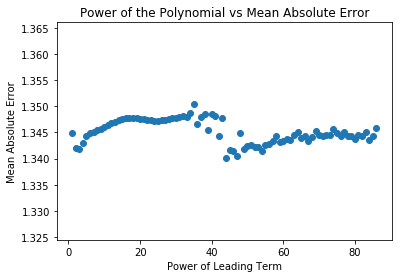

In [326]:
fig, ax = plt.subplots()
plt.scatter(x_power, MAEData)
plt.title("Power of the Polynomial vs Mean Absolute Error")
plt.xlabel("Power of Leading Term")
plt.ylabel("Mean Absolute Error")
plt.show()

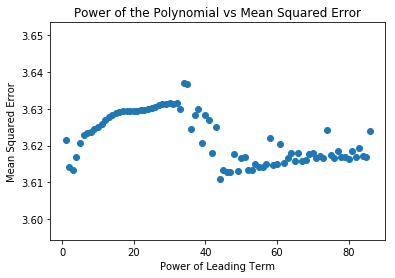

In [327]:
fig, ax = plt.subplots()
plt.scatter(x_power, MSEData)
plt.title("Power of the Polynomial vs Mean Squared Error")
plt.xlabel("Power of Leading Term")
plt.ylabel("Mean Squared Error")
plt.show()

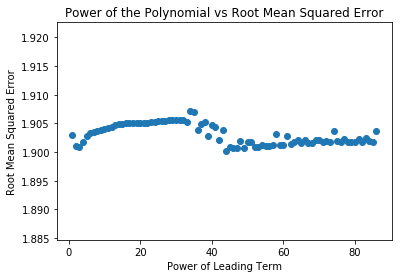

In [328]:
fig, ax = plt.subplots()
plt.scatter(x_power, RootMSEData)
plt.title("Power of the Polynomial vs Root Mean Squared Error")
plt.xlabel("Power of Leading Term")
plt.ylabel("Root Mean Squared Error")
plt.show()

Note: This implies that the best Leading Terms are either 2 or 44. 